#### Imports

In [ ]:
pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

#### Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Dry_Bean_Dataset.xlsx')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13609 non-null  float64
 4   AspectRation     13608 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13609 non-null  float64
 7   EquivDiameter    13610 non-null  float64
 8   Extent           13608 non-null  float64
 9   Solidity         13608 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13610 non-null  float64
 13  ShapeFactor2     13610 non-null  float64
 14  ShapeFactor3     13610 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Data Descreption

In [ ]:
number_of_samples = len(data)
number_of_features = data.shape[1]
feature_data_types = data.dtypes

print("Number of samples:", number_of_samples)
print("Number of features:", number_of_features)

print("Feature types:")
print(feature_data_types)

Number of samples: 13611
Number of features: 17
Feature types:
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Data Preprocessing

In [ ]:
null_values = data.isnull().sum()
print("Null values:")
print(null_values)

Null values:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    2
AspectRation       3
Eccentricity       0
ConvexArea         2
EquivDiameter      1
Extent             3
Solidity           3
roundness          0
Compactness        0
ShapeFactor1       1
ShapeFactor2       1
ShapeFactor3       1
ShapeFactor4       0
Class              0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Dealing with null values.
# Let's assume we're dropping rows with null values for simplicity.
data.dropna(inplace=True)

# Checking the null values again.
print(data.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Handling Scaling

In [ ]:
# let's use Min-Max scaling for demonstration.
# It transforms the features to a range between 0 and 1, enabling uniformity across feature scales for improved model performance.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop(columns=["Class"]))
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])  # Excluding the target variable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Exploratory Data Analysis

In [ ]:
# Exclude non-numeric columns before calculating the correlation matrix.
numeric_data = data.drop(columns=["Class"])
correlation_matrix = numeric_data.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


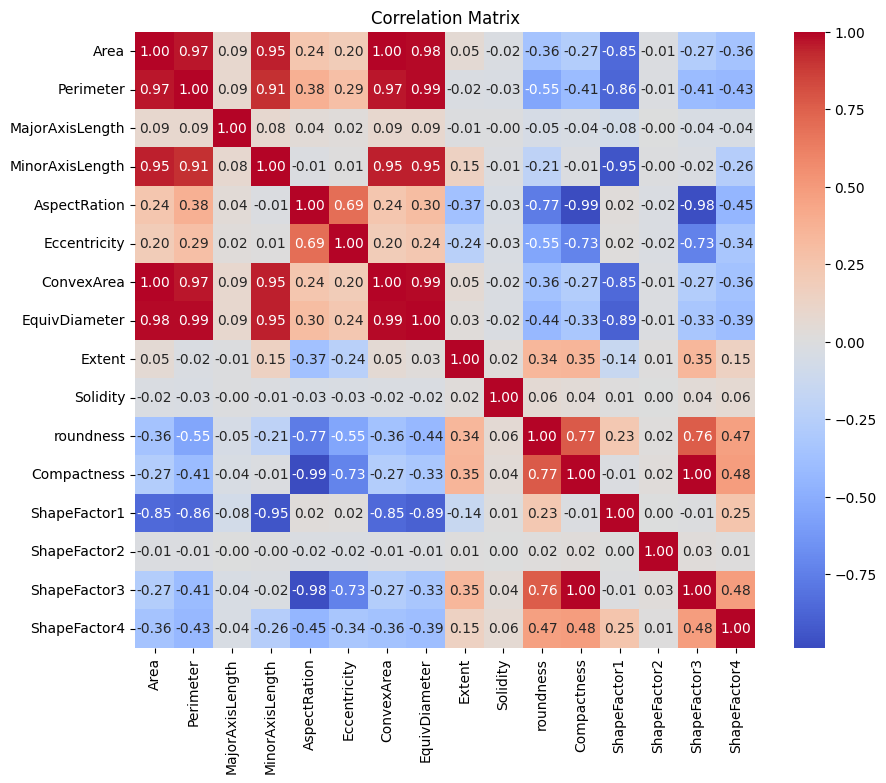

In [ ]:
# Visualize the correlation matrix as a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


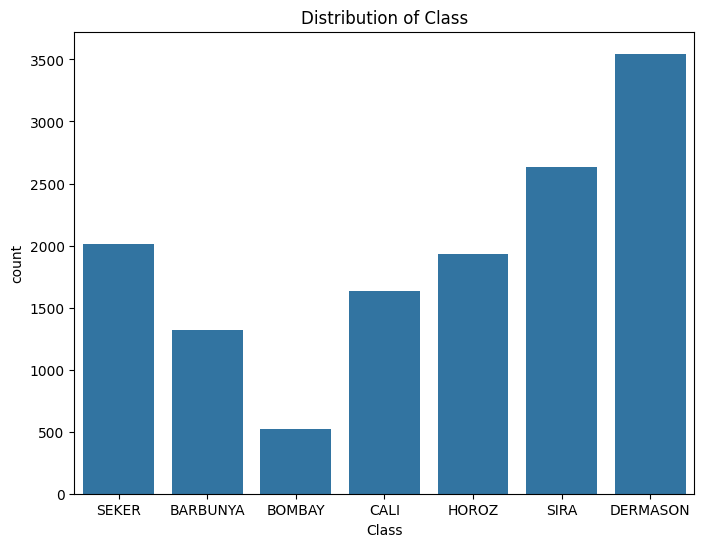

In [ ]:
# Bar plots for categorical features.
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Class')
plt.title('Distribution of Class')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


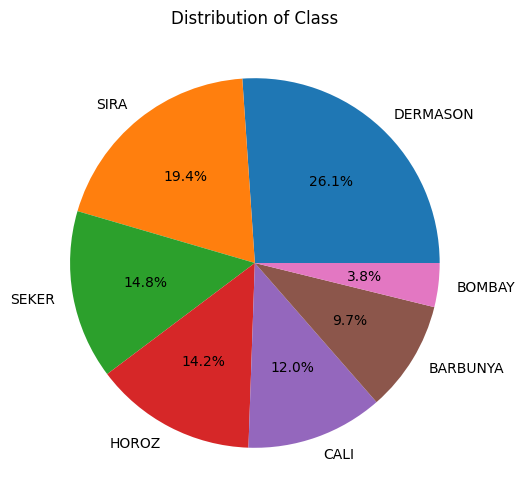

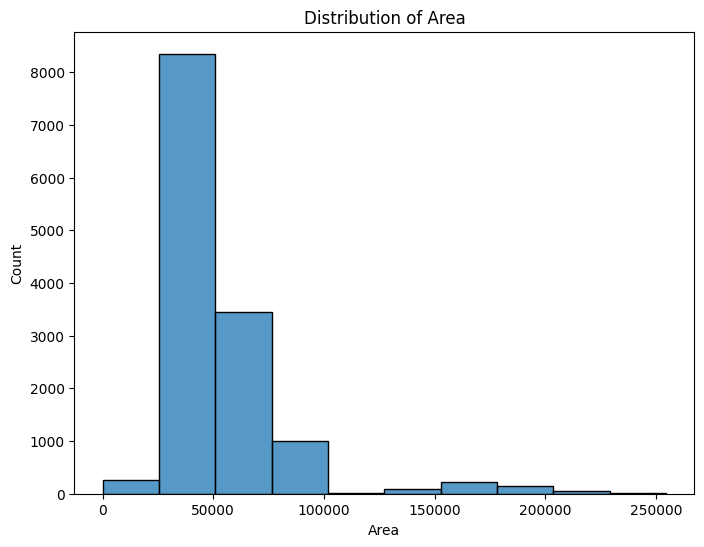

In [ ]:
# prompt: perform more Data Analysis on this dataset like pie chart histogram, line chart

# Pie chart for class distribution
class_counts = data['Class'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Class')
plt.show()

# Histogram for a numerical feature
plt.figure(figsize=(8, 6))
sns.histplot(data['Area'], bins=10, edgecolor='black')
plt.title('Distribution of Area')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


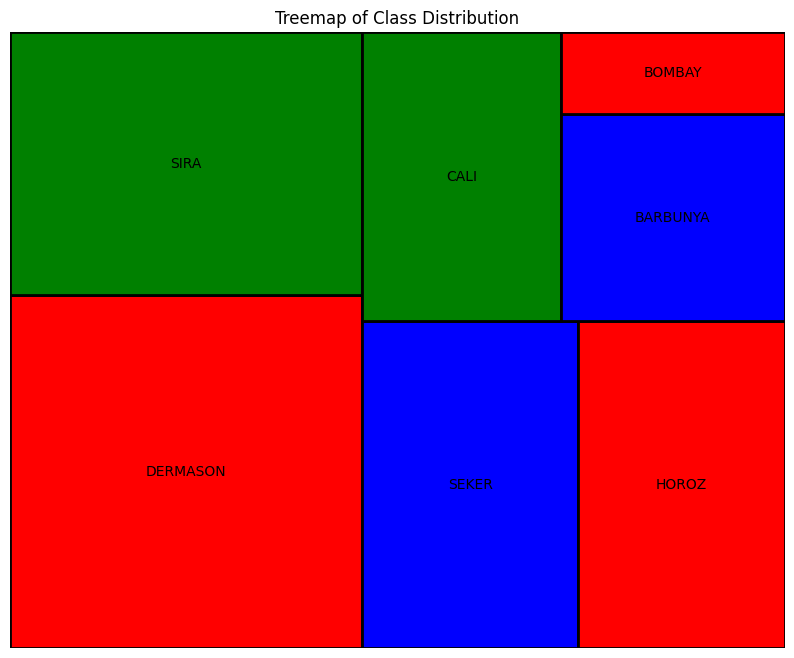

In [ ]:
# prompt: perform more Data Analysis on this dataset like tree map separate with black borders
# Prepare data for the treemap
class_counts = data['Class'].value_counts().to_dict()
labels = list(class_counts.keys())
sizes = list(class_counts.values())

# Create the treemap
fig = plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=['red', 'green', 'blue'], edgecolor='black', linewidth=2)

# Add title and show plot
plt.title('Treemap of Class Distribution')
plt.axis('off')
plt.show()

#### Supervised Learning

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

print("Categorical Features:")
print(categorical_features)

print("Numeric Features:")
print(numeric_features)

Categorical Features:
Index(['Class'], dtype='object')
Numeric Features:
Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Split Data into Training and Testing Sets.
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10876, 16)
X_test shape: (2719, 16)
y_train shape: (10876,)
y_test shape: (2719,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### KNN

In [ ]:
# Model Development
param_grid = {'n_neighbors': [3, 5, 7, 9]} # common values to try are 3, 5, 7, 9 (odd numbers to avoid tie situations).
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
knn_best = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Model Evaluation
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Calculating Accuracy
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Calculating Precision
precision = precision_score(y_test, y_pred_knn, average='weighted')
print("Precision:", precision)

# Calculating Recall
recall = recall_score(y_test, y_pred_knn, average='weighted')
print("Recall:", recall)

# Calculating F1-score
f1 = f1_score(y_test, y_pred_knn, average='weighted')
print("F1-score:", f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNN Accuracy: 0.9293858036042663
Precision: 0.929640934888621
Recall: 0.9293858036042663
F1-score: 0.929432376039531


In [ ]:
# Confusion Matrix
print("Confusion Matrix - KNN:")
print(confusion_matrix(y_test, y_pred_knn))

Confusion Matrix - KNN:
[[247   0  13   1   1   0   7]
 [  0 118   0   0   0   0   0]
 [  8   0 304   0   2   0   4]
 [  0   0   0 633   2  12  37]
 [  0   0   6   2 363   0   5]
 [  2   0   0  13   0 380  12]
 [  2   0   1  48   8   6 482]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


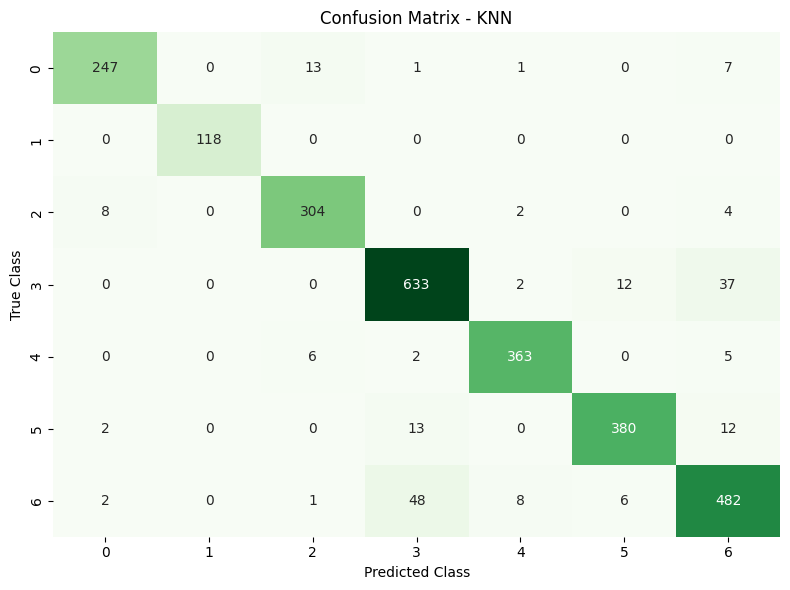

In [ ]:
# Plotting Confusion Matrix
# y_true (numpy.ndarray): True labels.
# y_pred (numpy.ndarray): Predicted labels.
# title (str): Title of the plot.
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, ax=ax)

    ax.set_title(title)
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel("True Class")

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix - KNN")

 ##### Logistic Regression

In [ ]:
# Define and Train Logistic Regression Classifier
logistic_regression_classifier = LogisticRegression(max_iter=1000)
logistic_regression_classifier.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(max_iter=1000)

In [ ]:
# Make Predictions on Testing Set
predicted_labels = logistic_regression_classifier.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Model Evaluation
# Calculating Accuracy
model_accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", model_accuracy)

# Calculating Precision
precision = precision_score(y_test, predicted_labels, average='weighted')
print("Precision:", precision)

# Calculating Recall
recall = recall_score(y_test, predicted_labels, average='weighted')
print("Recall:", recall)

# Calculating F1-score
f1 = f1_score(y_test, predicted_labels, average='weighted')
print("F1-score:", f1)

Accuracy: 0.9227657226921663
Precision: 0.9231950566245333
Recall: 0.9227657226921663
F1-score: 0.9229070380197701


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generate Confusion Matrix
confusion_matrix_logreg = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix - Logistic Regression:")
print(confusion_matrix_logreg)

Confusion Matrix - Logistic Regression:
[[246   0   9   0   1   0  13]
 [  0 118   0   0   0   0   0]
 [  9   0 304   0   1   1   3]
 [  0   0   0 621   2  14  47]
 [  0   0  11   3 357   0   5]
 [  5   0   0   7   0 382  13]
 [  1   0   0  45  13   7 481]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


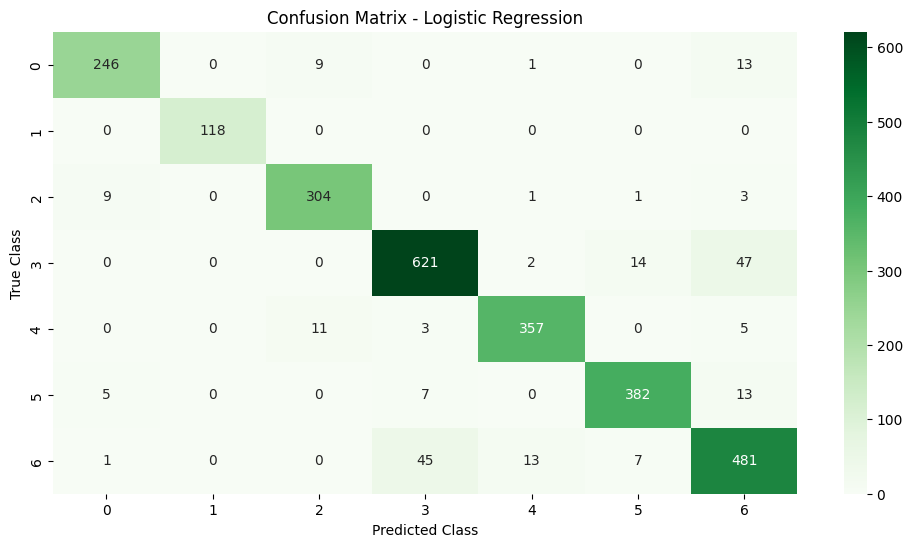

In [ ]:
# Visualize Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(confusion_matrix_logreg, annot=True, fmt="d", cmap="Greens", cbar=True, ax=ax)
ax.set_title("Confusion Matrix - Logistic Regression")
ax.set_xlabel("Predicted Class")
ax.set_ylabel("True Class")
plt.show()

#### Unsupervised Learning

##### K Means

In [ ]:
features = data.columns.drop(['Class'])
X = data.loc[:, features].values  # grabbing the features

y = data.loc[:,['Class']].values # grabbing the dependant variable

# Normalizing the features

X_normalized = StandardScaler().fit_transform(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.4207244  0.24333211 0.06263156]


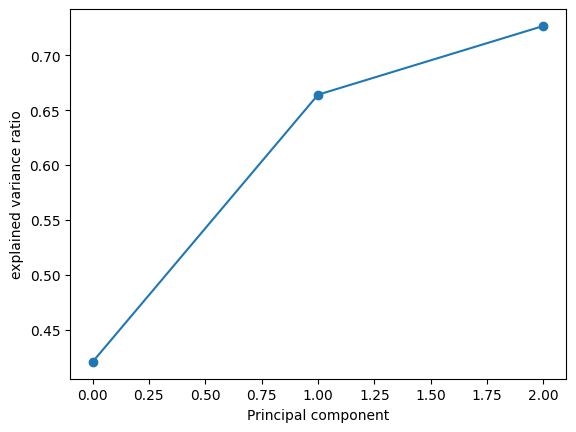

In [ ]:
pca = PCA(n_components = 3)

principal_components = pca.fit_transform(X_normalized)
print(pca.explained_variance_ratio_)
cumulative_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_ratio, marker='o')
plt.xlabel('Principal component')
plt.ylabel('explained variance ratio')
plt.show()

In [ ]:
pca_data = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2','PC3'])
pca_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3
0,-3.938539,-1.979520,-0.116669
1,-4.073611,-2.990780,-0.283987
2,-3.753140,-1.974014,-0.082127
3,-3.468165,-2.310441,-0.431571
4,-4.684909,-4.015599,-0.199387


In [ ]:
# add the dependant variable to the pca data
final_data = pd.concat([pca_data, data[['Class']]], axis = 1)
final_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3,Class
0,-3.938539,-1.979520,-0.116669,SEKER
1,-4.073611,-2.990780,-0.283987,SEKER
2,-3.753140,-1.974014,-0.082127,SEKER
3,-3.468165,-2.310441,-0.431571,SEKER
4,-4.684909,-4.015599,-0.199387,SEKER


In [ ]:
kmeans_model = KMeans(n_clusters =5).fit(pca_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


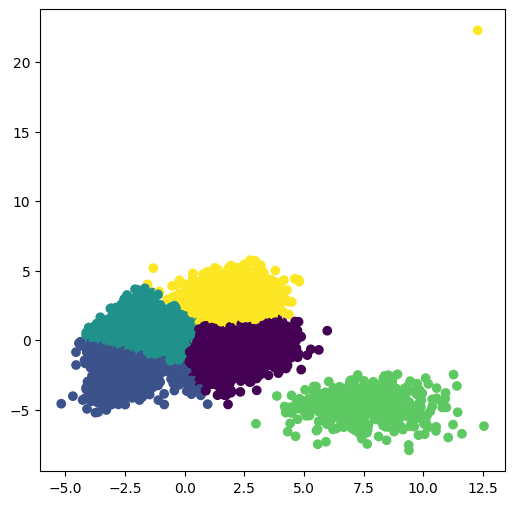

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(pca_data['PC1'],
           pca_data['PC2'],
           c = kmeans_model.labels_);

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_data, kmeans_model.labels_)
print('Silhouette Score: %.3f' % score)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score: 0.496


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


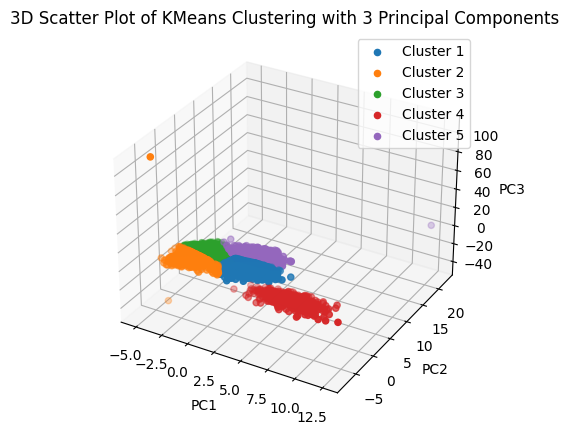

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in range(5):
    cluster_points = pca_data[kmeans_model.labels_ == cluster_label]
    ax.scatter(cluster_points['PC1'], cluster_points['PC2'], cluster_points['PC3'], label=f'Cluster {cluster_label + 1}')


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of KMeans Clustering with 3 Principal Components')
ax.legend()

plt.show()

##### Heirarchical Learning

In [ ]:
# Get the unique class labels from the data
unique_class_labels = data['Class'].unique()

# Create an AgglomerativeClustering instance
# with the number of clusters equal to the number of unique class labels
hierarchical_clusterer = AgglomerativeClustering(n_clusters=len(unique_class_labels))

# Fit the clustering model to the data and get the cluster labels
data['HierarchicalClusterLabels'] = hierarchical_clusterer.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print a header for the cluster counts
print("Hierarchical Clustering - Cluster Counts:")

# Get the value counts for the 'HierarchicalCluster' column
cluster_counts = data['HierarchicalClusterLabels'].value_counts()

# Print the cluster counts in a formatted way
for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label}: {count}")

Hierarchical Clustering - Cluster Counts:
Cluster 0: 4802
Cluster 1: 4613
Cluster 5: 1458
Cluster 6: 1223
Cluster 4: 979
Cluster 3: 335
Cluster 2: 185


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Create DataFrame
data = pd.DataFrame(X, columns=['Area', 'Perimeter'])

# Define a range of cluster numbers to evaluate
cluster_range = range(2, 8)  # Evaluate clustering with 2 to 7 clusters

# Initialize a dictionary to store silhouette scores for each number of clusters
silhouette_scores = {}

# Iterate over different numbers of clusters
for n_clusters in cluster_range:
    # Perform hierarchical clustering
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    data['HierarchicalClusterLabels'] = cluster.fit_predict(data[['Area', 'Perimeter']])

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(data[['Area', 'Perimeter']], data['HierarchicalClusterLabels'])

    # Store the silhouette score in the dictionary
    silhouette_scores[n_clusters] = silhouette_avg

# Print silhouette scores for each number of clusters
for n_clusters, silhouette_avg in silhouette_scores.items():
    print(f"Number of Clusters = {n_clusters}: Silhouette Score = {silhouette_avg:.4f}")



Number of Clusters = 2: Silhouette Score = 0.5902
Number of Clusters = 3: Silhouette Score = 0.7569
Number of Clusters = 4: Silhouette Score = 0.7916
Number of Clusters = 5: Silhouette Score = 0.6869
Number of Clusters = 6: Silhouette Score = 0.5574
Number of Clusters = 7: Silhouette Score = 0.4172


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


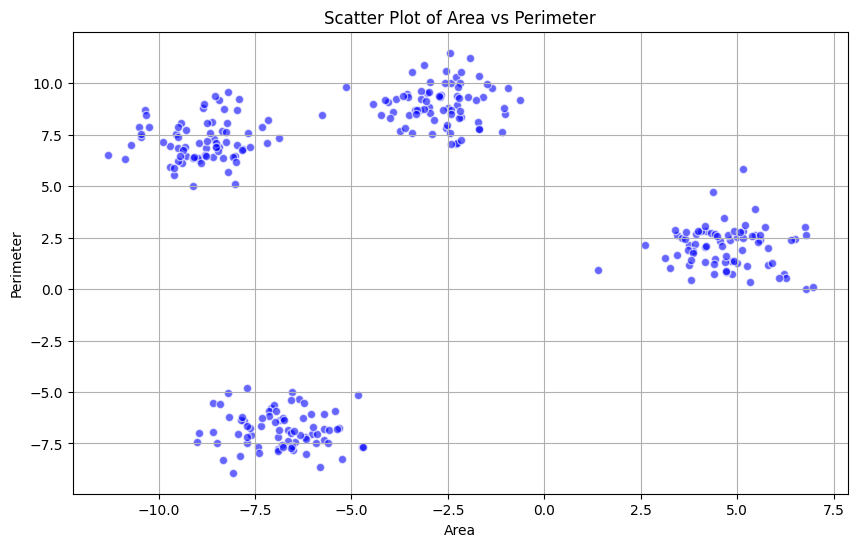

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Extract Area and Perimeter data
area_values = data['Area']
perimeter_values = data['Perimeter']

# Plot Area vs Perimeter as a scatter plot
plt.scatter(area_values, perimeter_values, c='b', alpha=0.6, edgecolors='w')

# Set title and labels
plt.title('Scatter Plot of Area vs Perimeter')
plt.xlabel('Area')
plt.ylabel('Perimeter')

# Show grid
plt.grid(True)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


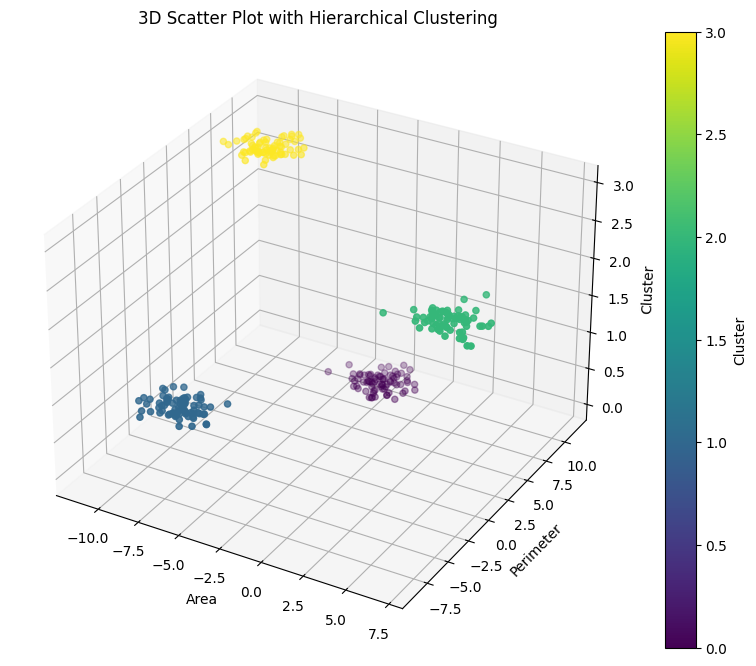

In [ ]:
# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Create DataFrame
data = pd.DataFrame(X, columns=['Area', 'Perimeter'])

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
data['HierarchicalClusterLabels'] = cluster.fit_predict(data)


# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['Area'], data['Perimeter'], data['HierarchicalClusterLabels'], c=data['HierarchicalClusterLabels'], cmap='viridis')
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Cluster')
plt.title('3D Scatter Plot with Hierarchical Clustering')
plt.colorbar(scatter, label='Cluster')
plt.show()